In [10]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd

img = cv2.imread('label2.jpg')

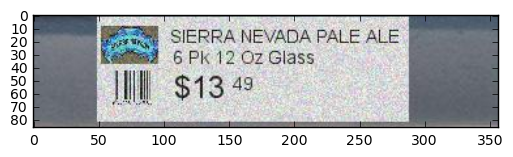

In [11]:
plt.imshow(img)
plt.show()

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

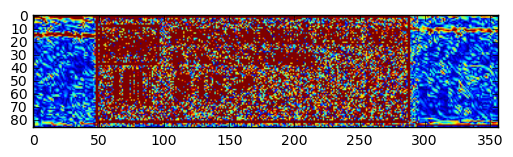

In [13]:
plt.imshow(gradient)
plt.show()

In [24]:
# blur and threshold the image
blurred = cv2.blur(gradient, (3, 3))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

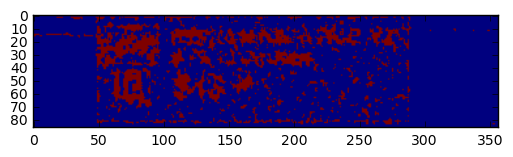

In [25]:
plt.imshow(thresh)
plt.show()

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

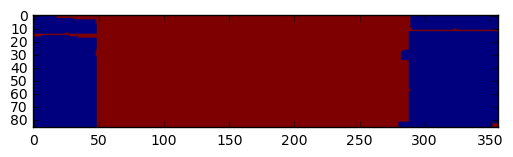

In [27]:
plt.imshow(closed)
plt.show()

In [28]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

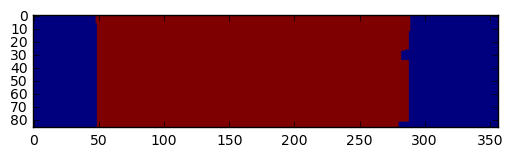

In [29]:
plt.imshow(closed)
plt.show()


-------------------------------------------------------------------------------------------------------------
Label2

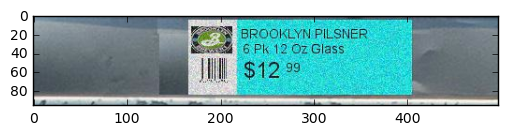

In [290]:
img = cv2.imread('label.jpg')

plt.imshow(img)
plt.show()

(96, 498, 3)


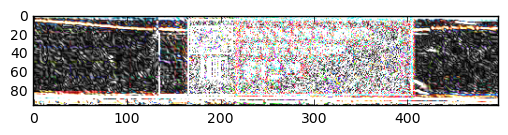

In [291]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#print img.shape

gradX = cv2.Sobel(img, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(img, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)


# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
#gradX = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
#gradY = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

print gradient.shape

plt.imshow(gradient)
plt.show()

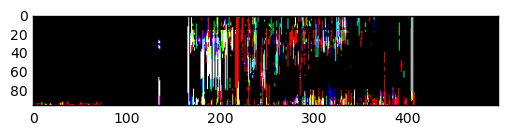

In [292]:
# blur and threshold the image
blurred = cv2.blur(gradient, (1, 30))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

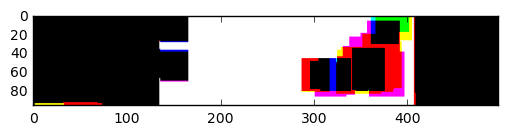

In [293]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed)
plt.show()

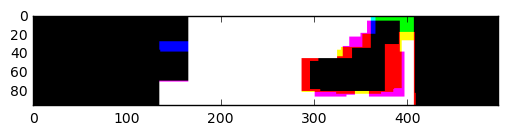

In [294]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

plt.imshow(closed)
plt.show()

In [295]:
print img.shape
print closed.shape

(96, 498, 3)
(96, 498, 3)


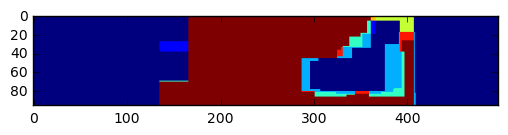

In [296]:
im_bw = cv2.cvtColor(closed, cv2.COLOR_RGB2GRAY)
plt.imshow(im_bw)
plt.show()

In [297]:
im_bw = cv2.cvtColor(closed, cv2.COLOR_RGB2GRAY)
(thresh, im_bw) = cv2.threshold(im_bw, 127,255,0)
#ret,thresh = cv2.threshold(closed,127,255,0)
#im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [273]:
cv2.drawContours(img, contours, 0, (0,255,0), 3)

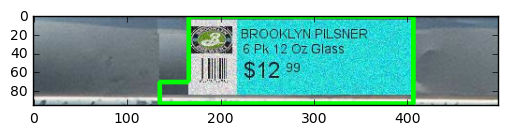

In [274]:
plt.imshow(img)
plt.show()

In [298]:
maxArea = cv2.contourArea(contours[0])
maxAreaIndex = 0
for i,contour in enumerate(contours):
    if maxArea < cv2.contourArea(contour):
        maxArea = cv2.contourArea(contour)
        maxAreaIndex = i

In [299]:
contours[maxAreaIndex]

array([[[166,   1]],

       [[166,  70]],

       [[165,  71]],

       [[135,  71]],

       [[135,  94]],

       [[406,  94]],

       [[406,   1]]], dtype=int32)

In [303]:
cnt = contours[maxAreaIndex]
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

In [305]:
mask = np.zeros(img.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))

In [307]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img,mask = mask)
mean_val = cv2.mean(im,mask = mask)
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

error: /home/maverick/Downloads/opencv-2.4.9/modules/core/src/stat.cpp:1013: error: (-215) (cn == 1 && (mask.empty() || mask.type() == CV_8U)) || (cn >= 1 && mask.empty() && !minIdx && !maxIdx) in function minMaxIdx


### Full Image

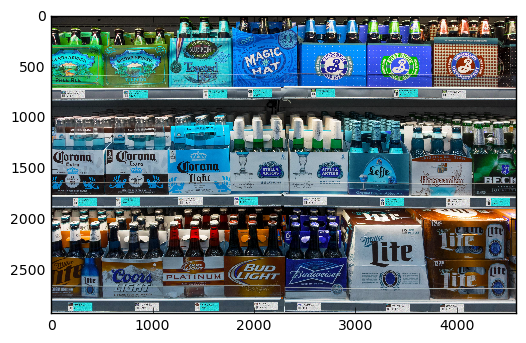

In [39]:
img = cv2.imread('full_image.jpg')

plt.imshow(img)
plt.show()

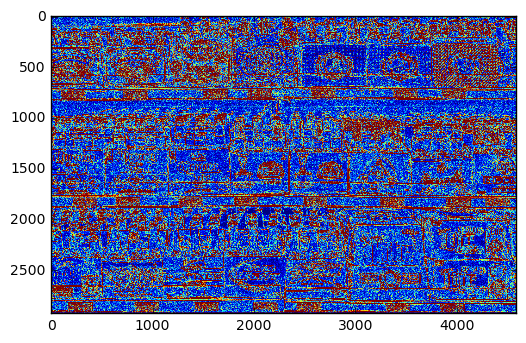

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

plt.imshow(gradient)
plt.show()

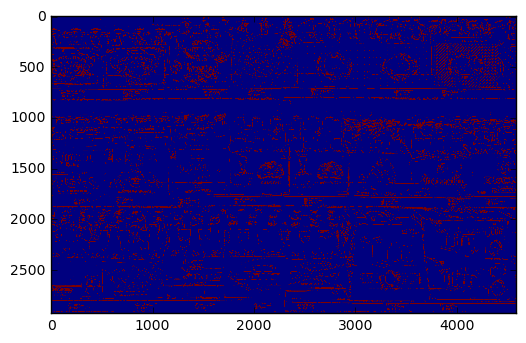

In [65]:
# blur and threshold the image
blurred = cv2.blur(gradient, (4, 4))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

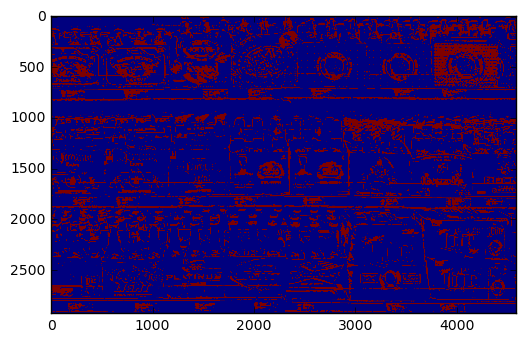

In [69]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed)
plt.show()

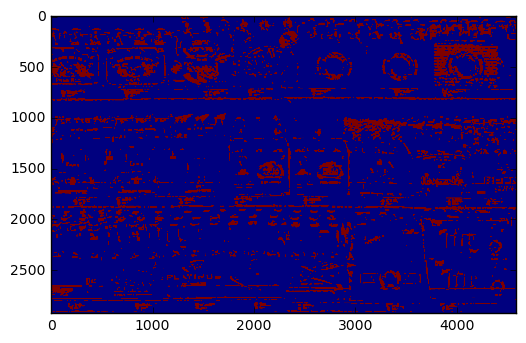

In [70]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

plt.imshow(closed)
plt.show()